# Word embeddings for IMDB data
    + here we train our own embeddings

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#load data
from keras.datasets import imdb

max_length = 20

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print(X_train.shape)
print(X_test.shape)

(25000,)
(25000,)


In [4]:
from keras.preprocessing.sequence import pad_sequences

In [5]:
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [6]:
X_train.shape

(25000, 20)

In [7]:
X_test.shape

(25000, 20)

In [8]:
y_train.shape

(25000,)

In [9]:
y_test.shape

(25000,)

## model

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [11]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, embeddings_initializer='uniform', input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 64)            64000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 65,281
Trainable params: 65,281
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
             metrics=['accuracy'],
             loss='binary_crossentropy')

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.6040 - acc: 0.6683 - val_loss: 0.5385 - val_acc: 0.7178
Epoch 2/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.4870 - acc: 0.7622 - val_loss: 0.5280 - val_acc: 0.7272
Epoch 3/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.4400 - acc: 0.7941 - val_loss: 0.5389 - val_acc: 0.7254
Epoch 4/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.3898 - acc: 0.8291 - val_loss: 0.5617 - val_acc: 0.7128
Epoch 5/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.3412 - acc: 0.8588 - val_loss: 0.5922 - val_acc: 0.7072
Epoch 6/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.2989 - acc: 0.8837 - val_loss: 0.6356 - val_acc: 0.6962
Epoch 7/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.2615 - acc: 0.9040 - val_loss: 0.6790 - val_acc:

## Plot

In [15]:
import matplotlib.pyplot as plt

In [16]:
history.history.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

In [17]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

num_of_data_points = len(train_acc)

In [18]:
len(train_acc)

10

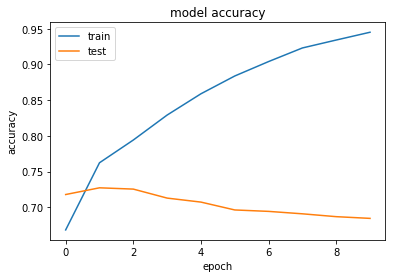

In [19]:
#plt.plot(num_of_data_points, train_acc)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

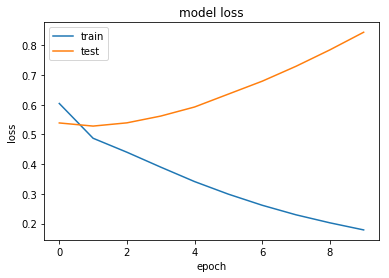

In [20]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()